In [2]:
import pandas as pd
import category_encoders as ce
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heart_data = pd.read_csv('data/heart.csv')

In [4]:
heart_data['old'] = heart_data['age'].apply(lambda x: 1 if x > 60 else 0)

In [5]:
def get_trestbps_mean(sex, age):
    
    if sex == 1:
        if age <= 20:
            return 123
        elif 20 < age <= 30:
            return 126
        elif 30 < age <= 40:
            return 129
        elif 40 < age <= 50:
            return 135
        elif 50 < age <= 60:
            return 142
        elif 60 < age:
            return 142
        
    else:
        if age <= 20:
            return 116
        elif 20 < age <= 30:
            return 120
        elif 30 < age <= 40:
            return 127
        elif 40 < age <= 50:
            return 137
        elif 50 < age <= 60:
            return 144
        elif 60 < age:
            return 159   


heart_data['trestbps_mean'] = heart_data[['sex', 'age']].apply(lambda x: get_trestbps_mean(*x), axis=1)

In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [11]:
oh_encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
oh_bin = oh_encoder.fit_transform(heart_data[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart_data = pd.concat([heart_data, oh_bin], axis=1)

c:\Users\Люля\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Люля\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Люля\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\Люля\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteri

In [13]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


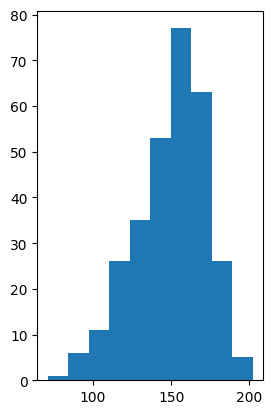

In [19]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
plt.hist(heart_data['thalach']) # гистограмма распределения признака
plt.show() # просмотр графика

In [20]:
mm_scaler = preprocessing.MinMaxScaler()
heart_data['age'] = pd.DataFrame(mm_scaler.fit_transform(heart_data[['age']]))
heart_data['trestbps'] = pd.DataFrame(mm_scaler.fit_transform(heart_data[['trestbps']]))
heart_data['thalach'] = pd.DataFrame(mm_scaler.fit_transform(heart_data[['thalach']]))

In [21]:
r_scaler = preprocessing.RobustScaler()
heart_data['chol'] = pd.DataFrame(r_scaler.fit_transform(heart_data[['chol']]))

<AxesSubplot: >

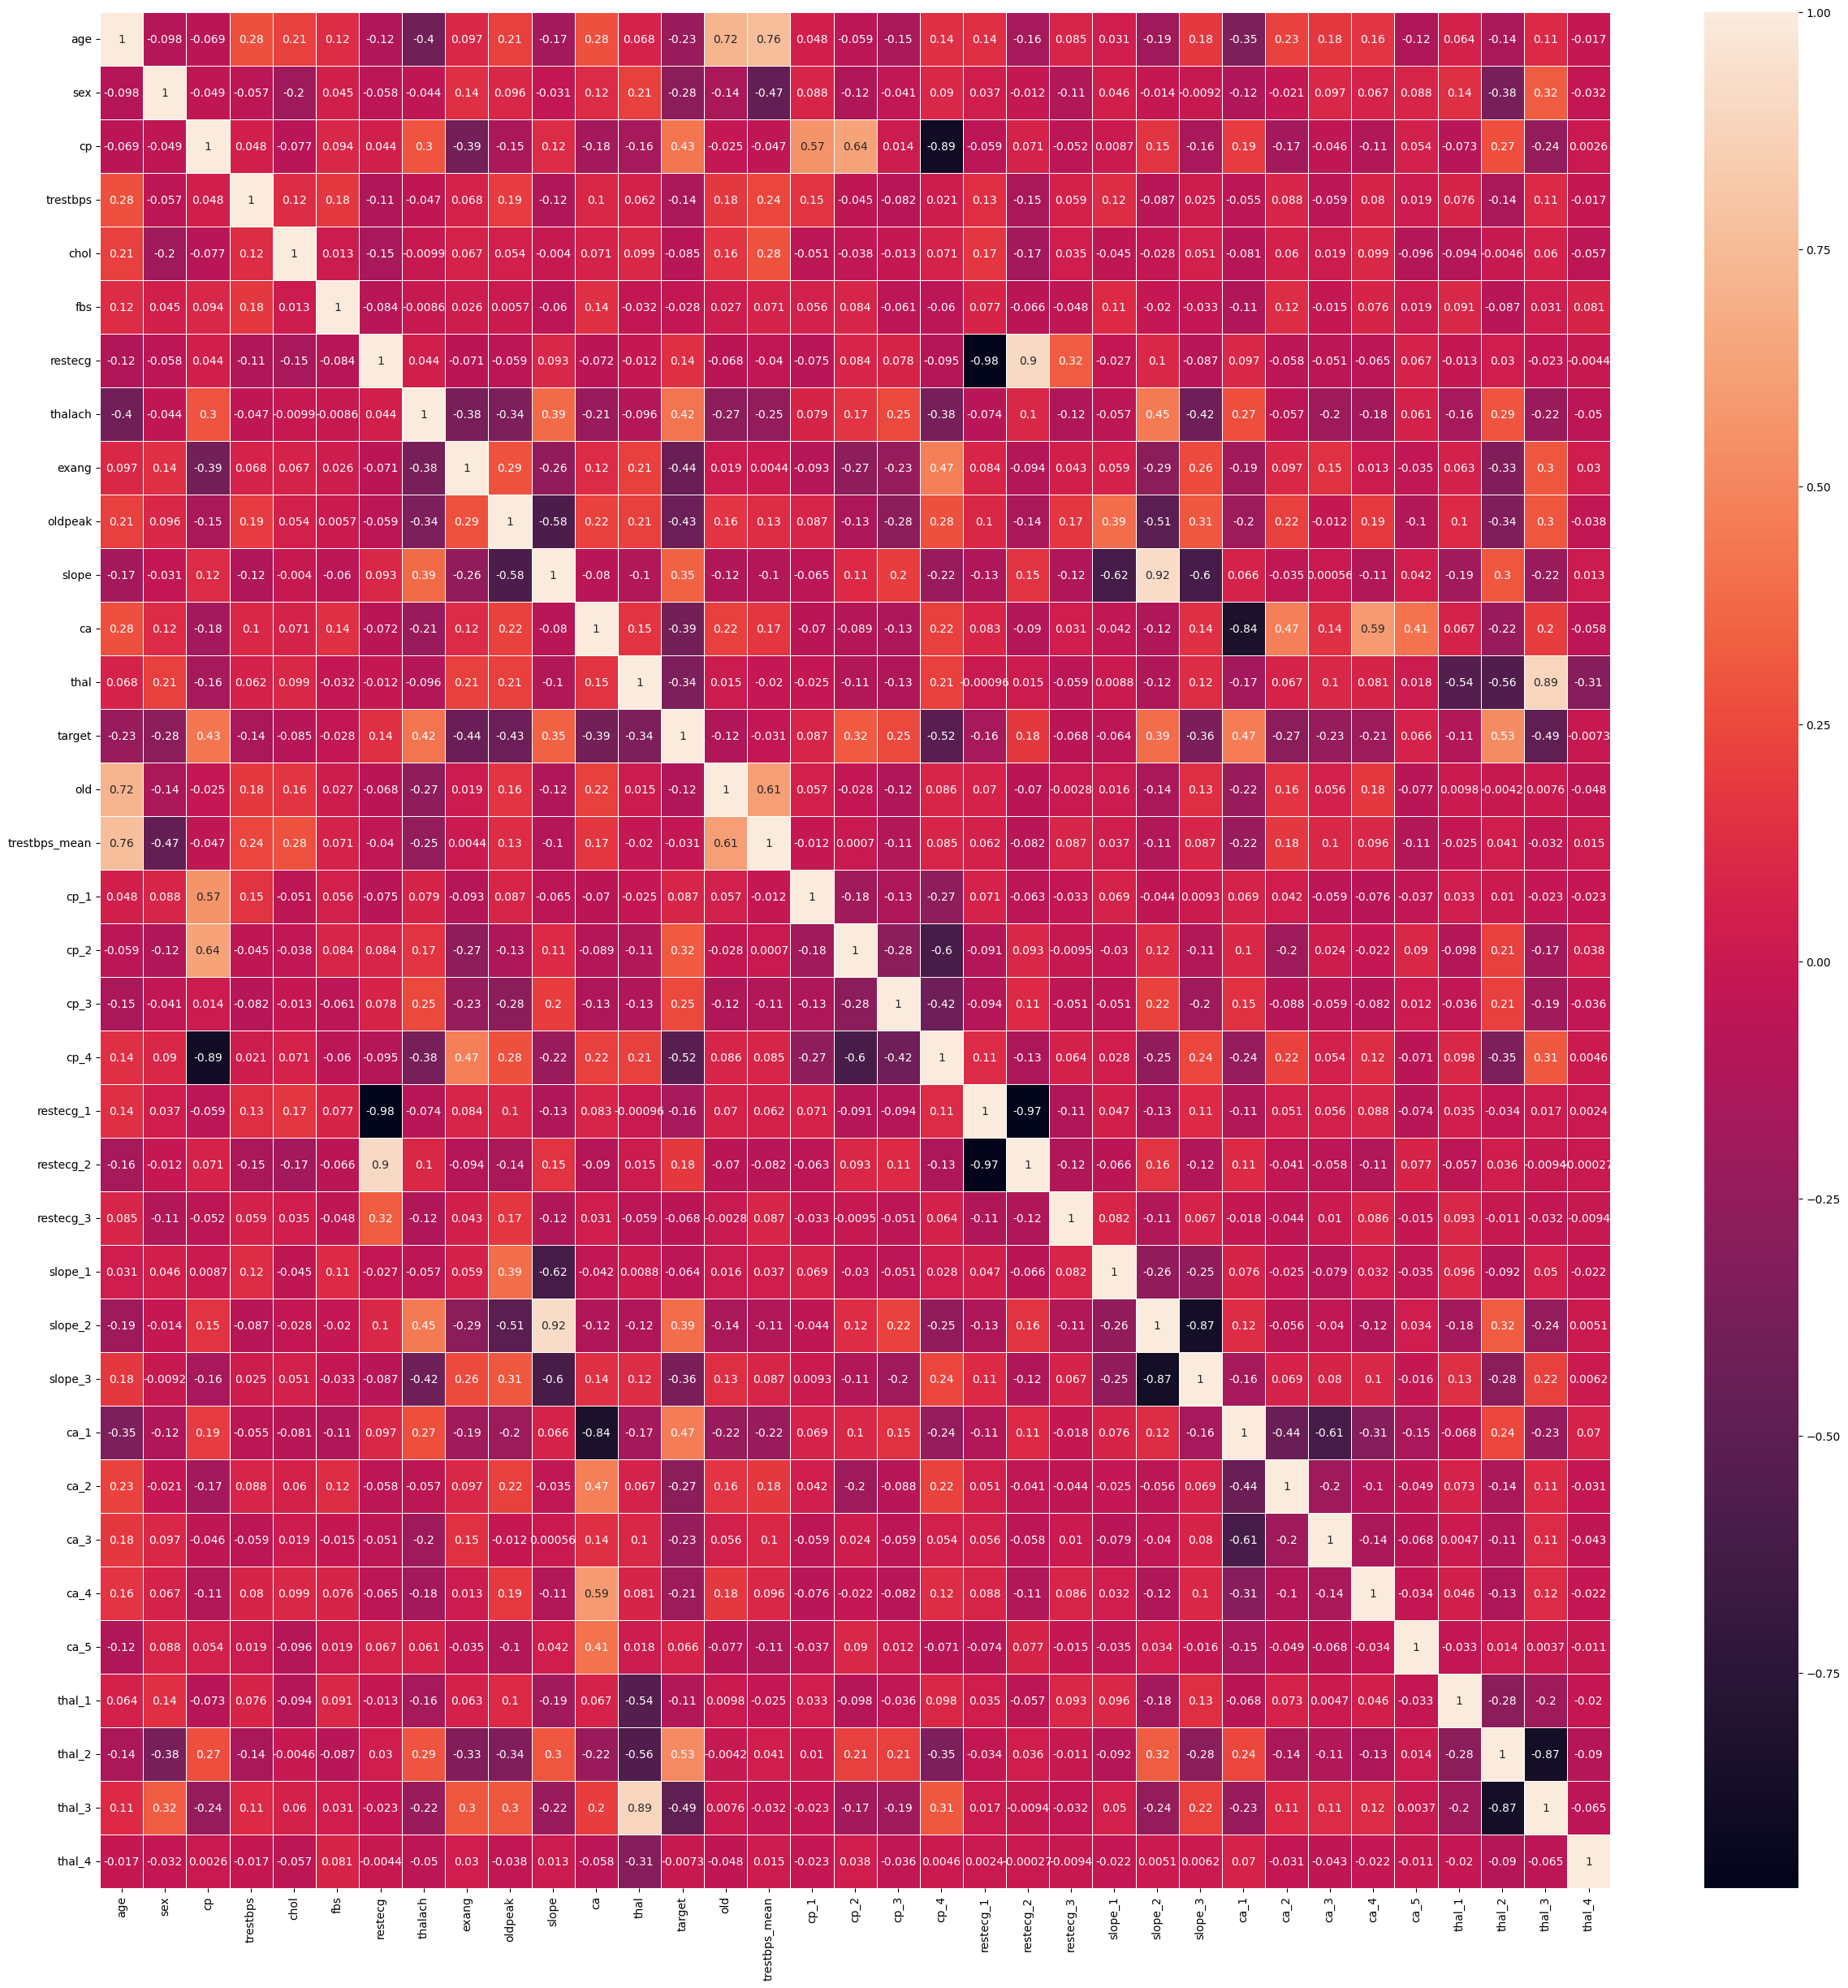

In [25]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(heart_data.corr(), annot = True, linewidths=.5, ax=ax)